<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 4

## San Francisco Data

---

[San Francisco provides a wealth of data on the city to the public.](https://data.sfgov.org/) Project 4 is all about exploring this data and modeling interesting relationships with regression.

Project 4 is also much more open-ended than the previous projects. You are more responsible for finding things about the data that interest you, coming up with your own hypothesis about it, and reporting on the analysis you carry out. That being said, there are still specific requirements and restrictions on the type of models you will be constructing.

---

## Notes on the data

We have gone through the above website and pulled out a variety of different datasets that we think are particularly interesting. Some of the datasets are from external sources as well, but all are related to San Francisco. A high level overview of data folders is provided after the project requirements section.

**There is a lot of different data. You are _NOT_ expected to explore all of it or include all of it in analyses.** The point of the project is to focus on aspects of San Francisco that are particularly interesting to you from a modeling point of view. 

**The uncompressed data is a large filesize.** Even the compressed data is pretty large. The data is compressed into a .7z format which has one of the smallest filesizes available. You will likely need a 3rd party app to extract it. 

### Recommended Utilities for .7z
- For OSX [Keka](http://www.kekaosx.com/en/) or [The Unarchiver](http://wakaba.c3.cx/s/apps/unarchiver.html). 
- For Windows [7-zip](http://www.7-zip.org/) is the standard. 
- For Linux try the `p7zip` utility.  `sudo apt-get install p7zip`.

---

## Project requirements

**You will be performing 4 different sections of analysis on the San Francisco data.**

**Models must be regression. This means that your target variable needs to be numeric/continuous**

Do not perform classification models – this will be the topic of week 4.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 1. Choose a dataset or datasets of interest to you and perform EDA

---

1. Explain what the data is. This may include multiple csv files. Some of this data has hard to understand codes representing the variables. Nearly all data is pulled from https://data.sfgov.org/ so this is a very good resource for determining what the data is.
- Clean the data.
- Develop and state clearly a hypothesis about the data that you would want to test.
- Create some initial visualizations on the portions of the data relevant to your hypothesis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [3]:
# 311_case_records, food_inspections, assessor_office, 
# health_care_facilities, business_permits, mobile_food
# city_budget, neighborhood_analysis, city_spending_revenue
# parks, city_survey, schools, colleges, sf_crime
# evictions, yelp_sf_healthcode_violations
# film_locations, zillow_property_sales, fire_data

In [4]:
# df_311 = pd.read_csv('/Users/edwardlee/Desktop/DSI/DSI-SF-2/datasets/san_francisco/san_francisco/311_case_records/311_records.csv')
# df_mobile_food_schedule = pd.read_csv('/Users/edwardlee/Desktop/DSI/DSI-SF-2/datasets/san_francisco/san_francisco/mobile_food/sf_mobile_food_schedules.csv')
# df_inspections = pd.read_csv('/Users/edwardlee/Desktop/DSI/DSI-SF-2/datasets/san_francisco/san_francisco/food_inspections/food_inspections_LIVES_standard.csv')
# df_mobile_food_permits = pd.read_csv('/Users/edwardlee/Desktop/DSI/DSI-SF-2/datasets/san_francisco/san_francisco/mobile_food/sf_mobile_food_permits.csv')
# df_biz_permits = pd.read_csv('/Users/edwardlee/Desktop/DSI/DSI-SF-2/datasets/san_francisco/san_francisco/business_permits/sf_business_locations_permits.csv')
# df_colleges = pd.read_csv('/Users/edwardlee/Desktop/DSI/DSI-SF-2/datasets/san_francisco/san_francisco/colleges/sf_colleges_2011.csv')
# df_schools = pd.read_csv('/Users/edwardlee/Desktop/DSI/DSI-SF-2/datasets/san_francisco/san_francisco/schools/sf_schools.csv')
df_property = pd.read_csv('/Users/edwardlee/Desktop/DSI/DSI-SF-2/datasets/san_francisco/san_francisco/zillow_property_sales/zillow_mediansale_persqft_neighborhood.csv')

In [5]:
df_property_new = df_property[['City', 'State', 'SizeRank', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12']]
df_property_new.head(10).T

,0,1,2,3,4,5,6,7,8,9
City,Dallas,Las Vegas,Phoenix,New York,Los Angeles,Los Angeles,New York,Las Vegas,New York,Las Vegas
State,TX,NV,AZ,NY,CA,CA,NY,NV,NY,NV
SizeRank,1,2,3,4,5,6,7,8,9,10
2015-01,142.017,104.44,78.8101,1357.09,417.722,241.576,1270.2,83.3677,NaN,115.769
2015-02,150.742,104.77,79.7817,1383.95,387.134,NaN,1223.06,85.6067,NaN,114.126
2015-03,159.001,107.538,81.6565,1339.44,404.32,285.638,1244.13,86.8248,NaN,116.532
2015-04,158.895,110.99,82.6971,1411.41,419.014,289.931,1191.83,89.5903,NaN,115.786
2015-05,166.271,111.109,85.0326,1478.4,425.496,278.627,1317.35,92.163,NaN,118.445
2015-06,170.279,110.585,87.3734,1532.28,403.935,266.885,1323.08,93.2327,NaN,120.23
2015-07,170.274,110.188,87.6935,1515.27,413.917,275.453,1294.22,94.2789,NaN,122.929


# Hypothesis

California has the highest property price in the US, and the most expensive time of the year was in June.

In [6]:
city_mask = (df_property_new['State'] == 'CA') | (df_property_new['State'] == 'NY')
df_property_new = df_property_new[city_mask]
df_property_new.head().T

,3,4,5,6,8
City,New York,Los Angeles,Los Angeles,New York,New York
State,NY,CA,CA,NY,NY
SizeRank,4,5,6,7,9
2015-01,1357.09,417.722,241.576,1270.2,NaN
2015-02,1383.95,387.134,NaN,1223.06,NaN
2015-03,1339.44,404.32,285.638,1244.13,NaN
2015-04,1411.41,419.014,289.931,1191.83,NaN
2015-05,1478.4,425.496,278.627,1317.35,NaN
2015-06,1532.28,403.935,266.885,1323.08,NaN
2015-07,1515.27,413.917,275.453,1294.22,NaN


In [7]:
df_property_new = df_property_new.groupby(['State','City'])[['2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12']].mean().reset_index()
df_property_new.head()

,State,City,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12
0,CA,Anaheim,304.956733,294.215822,299.301400,306.294420,313.719420,315.393021,320.227175,317.591117,318.743419,319.379080,331.933033,329.307297
1,CA,Bakersfield,NaN,NaN,NaN,126.142902,157.172022,117.447708,138.880619,130.631300,118.906700,113.689000,NaN,NaN
2,CA,Chula Vista,235.803033,226.348200,234.810833,243.314269,246.541550,243.727416,245.755133,252.900340,247.078027,250.118680,254.345600,261.442670
3,CA,Corona,204.814600,202.539200,201.864800,212.438199,214.661724,215.344726,221.093550,220.580950,226.195760,215.738823,231.564700,210.244300
4,CA,Eastvale,161.077000,158.357400,163.812900,164.783600,165.102900,167.167500,167.937700,173.899100,172.634500,176.118600,171.507900,161.677400


In [8]:
df_property_new = df_property_new.dropna().head()

In [9]:
df_long = pd.melt(df_property_new, id_vars=['State','City'], value_vars=['2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12'], var_name='dates', value_name='property_sales')
df_long

,State,City,dates,property_sales
0,CA,Anaheim,2015-01,304.956733
1,CA,Chula Vista,2015-01,235.803033
2,CA,Corona,2015-01,204.814600
3,CA,Eastvale,2015-01,161.077000
4,CA,Fresno,2015-01,120.657800
5,CA,Anaheim,2015-02,294.215822
6,CA,Chula Vista,2015-02,226.348200
7,CA,Corona,2015-02,202.539200
8,CA,Eastvale,2015-02,158.357400
9,CA,Fresno,2015-02,120.690043


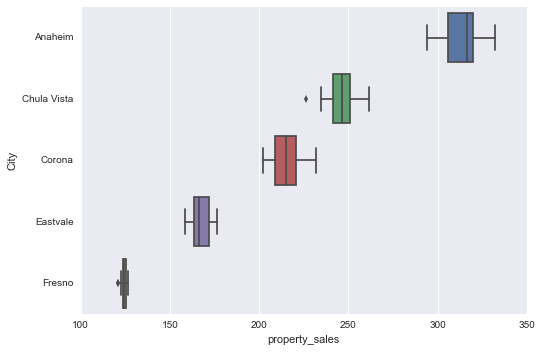

In [10]:
import seaborn as sns
# df_long.boxplot(column='property_sales', by='City')
sns.boxplot(x=df_long['property_sales'], y=df_long['City'])

In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
df_long['property_sales'] = scaler.fit_transform(df_long['property_sales'])

df_long

/Users/edwardlee/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/edwardlee/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


,State,City,dates,property_sales
0,CA,Anaheim,2015-01,0.872317
1,CA,Chula Vista,2015-01,0.545001
2,CA,Corona,2015-01,0.398328
3,CA,Eastvale,2015-01,0.191311
4,CA,Fresno,2015-01,0.000000
5,CA,Anaheim,2015-02,0.821478
6,CA,Chula Vista,2015-02,0.500250
7,CA,Corona,2015-02,0.387558
8,CA,Eastvale,2015-02,0.178438
9,CA,Fresno,2015-02,0.000153


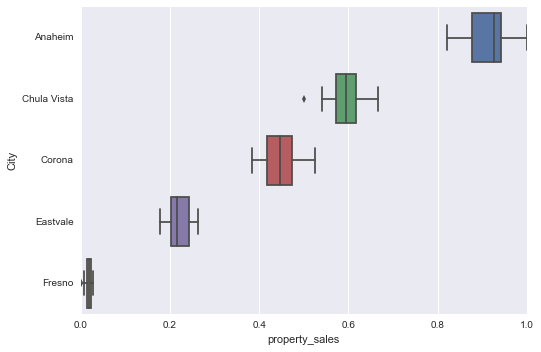

In [12]:
sns.boxplot(x=df_long['property_sales'], y=df_long['City'])

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2. Construct and evaluate a linear regression model on the data

---

1. State the variables that are predictors in your linear regression and the target variable.
- Investigate and remove any outliers or other problems in your data. _This is a subjective process._
- Construct a linear regression model.
- Evaluate the model. How does the $R^2$ of the overall model compare to cross-validated $R^2$. What do the differences in $R^2$ mean?
  - Use test / train split
  - Use K-Folds
  - Compare and explain your results with both
- Visualize the evaluation metrics of your analysis in clear charts.
- Summarize your results in the context of your hypothesis. Frame this as if you are presenting to non-technical readers.


In [13]:
df_property_new.columns

Index([u'State', u'City', u'2015-01', u'2015-02', u'2015-03', u'2015-04',
       u'2015-05', u'2015-06', u'2015-07', u'2015-08', u'2015-09', u'2015-10',
       u'2015-11', u'2015-12'],
      dtype='object')

In [14]:
ca_mask = (df_property_new['State'] == 'CA')
df_ca = df_property_new[ca_mask].dropna()
df_ca.head()

,State,City,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12
0,CA,Anaheim,304.956733,294.215822,299.301400,306.294420,313.719420,315.393021,320.227175,317.591117,318.743419,319.379080,331.933033,329.307297
2,CA,Chula Vista,235.803033,226.348200,234.810833,243.314269,246.541550,243.727416,245.755133,252.900340,247.078027,250.118680,254.345600,261.442670
3,CA,Corona,204.814600,202.539200,201.864800,212.438199,214.661724,215.344726,221.093550,220.580950,226.195760,215.738823,231.564700,210.244300
4,CA,Eastvale,161.077000,158.357400,163.812900,164.783600,165.102900,167.167500,167.937700,173.899100,172.634500,176.118600,171.507900,161.677400
6,CA,Fresno,120.657800,120.690043,122.391257,125.226157,124.813057,126.175357,126.284100,125.576071,124.166071,125.346157,124.209386,124.303514


In [15]:
df_ca.rename(columns={'2015-01':'Jan','2015-02':'Feb','2015-03':'Mar','2015-04':'April','2015-05':'May', '2015-06':'June','2015-07':'July','2015-08':'Aug','2015-09':'Sept','2015-10':'Oct','2015-11':'Nov','2015-12':'Dec'}, inplace=True)

In [16]:
import patsy

formula = 'June ~ Jan + Feb + Mar + April + May + July + Aug + Sept + Oct + Nov + Dec - 1'
y, X = patsy.dmatrices(formula, df_ca, return_type='dataframe')
X.head()

,Jan,Feb,Mar,April,May,July,Aug,Sept,Oct,Nov,Dec
0,304.956733,294.215822,299.301400,306.294420,313.719420,320.227175,317.591117,318.743419,319.379080,331.933033,329.307297
2,235.803033,226.348200,234.810833,243.314269,246.541550,245.755133,252.900340,247.078027,250.118680,254.345600,261.442670
3,204.814600,202.539200,201.864800,212.438199,214.661724,221.093550,220.580950,226.195760,215.738823,231.564700,210.244300
4,161.077000,158.357400,163.812900,164.783600,165.102900,167.937700,173.899100,172.634500,176.118600,171.507900,161.677400
6,120.657800,120.690043,122.391257,125.226157,124.813057,126.284100,125.576071,124.166071,125.346157,124.209386,124.303514


In [17]:
y = df_ca['June'].values

In [18]:
from sklearn.cross_validation import train_test_split

trainX, testX, trainY, testY = train_test_split(X, y, train_size=.75)
print trainX.shape, testX.shape
print trainY.shape, testY.shape

(3, 11) (2, 11)
(3,) (2,)


In [19]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
model = lm.fit(trainX, trainY)
prediction = model.predict(testX)
score = model.score(testX, testY)
print 'R^2: ', score

R^2:  0.990308844875


Cross Validated Score:  [ 0.  0.  0.  0.  0.]
Cross-Predicted Accuracy: 0.997794978614


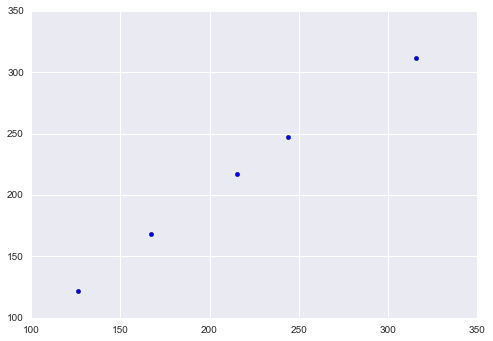

In [21]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

scores = cross_val_score(model, X, y, cv=5)
print 'Cross Validated Score: ', scores

predictions = cross_val_predict(model, X, y, cv=5)
plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print "Cross-Predicted Accuracy:", accuracy

# Summarization

I cross validated all California cities that have monthly data together and got a ridiculously high R^2. I accept my null hypothesis, but it was not a good hypothesis because I did not expect over 800 instances in different months were empty values. A better hypothesis might have been comparing different big cities around the US, such as, New York City vs Los Angeles vs San Francisco vs Chicago vs Seattle, etc... and San Francisco being 20% higher than all other cities.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2.2 Explain $R^2$ vs. mean squared error (MSE)

---

1. If you have negative $R^2$ values in cross-validation, what does this mean? 
2. Why can $R^2$ only be negative when the model is tested on new data?

# 1.

A negative R^2 means that there is overfitting in every iteration because of a high amount of variables that may cause the model to skew. If there is negative R^2 during cross validation, it may be better to use Lasso or Ridge to adjust the variables accordingly by either removing useless variables or balancing them.

# 2.

R^2 can only be negative tested on new data because if the first iteration has a giant negative R-squared for its first fit, then that Linear Regression line/model will not fit in any other sets of training/testing data. The variance or distance between the first line/model with the 2nd set of data is so large that the Residual sum of squares is larger than the baseline model causing the R^2 to be negative.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3. Combine multiple sources of data and evaluate a model with regularized regression

---

**I recommend having many predictors to see benefits from regularization methods, but it's up to you.**

1. Use _NEW_ sources of data for this section. It should not be related to your analysis/hypothesis from section 1.
- Like in part 1, you should state a hypothesis and perform data cleaning and EDA _only_ on the relevant portions of your data. Don't waste time!
- Construct and evaluate different models with cross-validated $R^2$. Compare LinearRegression, Lasso, Ridge, and ElasticNet. Find the optimal hyperparameters (alpha, l1_ratio) using gridsearch.
- Report on which model is best, and why that might be the case (hint: does your data have multicollinearity? Irrelevant variables? Both?)
- Plot visuals that compare the performance of the four models.


In [22]:
# df_crime = pd.read_csv('/Users/edwardlee/Desktop/DSI/DSI-SF-2/datasets/san_francisco/san_francisco/sf_crime/sfpd_incidents_from2003.csv')
# df_neighborhood = pd.read_csv('/Users/edwardlee/Desktop/DSI/DSI-SF-2/datasets/san_francisco/san_francisco/neighborhood_analysis/sf_neighborhood_analysis.csv')

In [23]:
df_yelp_neighborhood = pd.read_csv('/Users/edwardlee/Desktop/DSI/DSI-SF-2/datasets/san_francisco/san_francisco/yelp_sf_healthcode_violations/neighborhood_legend.csv')
df_yelp_biz = pd.read_csv('/Users/edwardlee/Desktop/DSI/DSI-SF-2/datasets/san_francisco/san_francisco/yelp_sf_healthcode_violations/businesses.csv')
df_yelp_code = pd.read_csv('/Users/edwardlee/Desktop/DSI/DSI-SF-2/datasets/san_francisco/san_francisco/yelp_sf_healthcode_violations/code_legend.csv')
df_yelp_inspect = pd.read_csv('/Users/edwardlee/Desktop/DSI/DSI-SF-2/datasets/san_francisco/san_francisco/yelp_sf_healthcode_violations/inspections.csv')
df_yelp_violations = pd.read_csv('/Users/edwardlee/Desktop/DSI/DSI-SF-2/datasets/san_francisco/san_francisco/yelp_sf_healthcode_violations/violations.csv')
df_yelp_violations_parsed = pd.read_csv('/Users/edwardlee/Desktop/DSI/DSI-SF-2/datasets/san_francisco/san_francisco/yelp_sf_healthcode_violations/violations_parsed_words.csv')

/Users/edwardlee/anaconda/envs/dsi/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (10,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
print df_yelp_violations_parsed.shape
print df_yelp_violations.shape
print df_yelp_inspect.shape
print df_yelp_code.shape
print df_yelp_neighborhood.shape
print df_yelp_biz.shape

(32455, 393)
(39917, 3)
(15431, 4)
(4, 3)
(44, 4)
(6162, 9)


In [64]:
df_1 = df_yelp_violations_parsed[['business_id','violation_count','days_since_first_violation','population','business_count']]
df_1.head()

,business_id,violation_count,days_since_first_violation,population,business_count
0,10.0,1.0,0.0,"13,000",112.0
1,10.0,1.0,0.0,"13,000",112.0
2,10.0,1.0,0.0,"13,000",112.0
3,10.0,2.0,196.0,"13,000",112.0
4,10.0,2.0,196.0,"13,000",112.0


In [32]:
df_yelp_violations_parsed.ix[:,:20].head()

,business_id,score,date,type,violation_count,days_since_first_violation,name,address,city,state,postal_code,latitude,longitude,phone_number,polygon,neighborhood,population,score_code,business_count,description
0,10.0,92.0,2014-01-14,routine,1.0,0.0,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco,CA,94104,37.791116,-122.403816,1.41542e+10,10.0,Downtown,"13,000",good,112.0,Inadequate and inaccessible handwashing facili...
1,10.0,92.0,2014-01-14,routine,1.0,0.0,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco,CA,94104,37.791116,-122.403816,1.41542e+10,10.0,Downtown,"13,000",good,112.0,Unclean or degraded floors walls or ceilings
2,10.0,92.0,2014-01-14,routine,1.0,0.0,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco,CA,94104,37.791116,-122.403816,1.41542e+10,10.0,Downtown,"13,000",good,112.0,Improper storage of equipment utensils or line...
3,10.0,94.0,2014-07-29,routine,2.0,196.0,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco,CA,94104,37.791116,-122.403816,1.41542e+10,10.0,Downtown,"13,000",good,112.0,Insufficient hot water or running water
4,10.0,94.0,2014-07-29,routine,2.0,196.0,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco,CA,94104,37.791116,-122.403816,1.41542e+10,10.0,Downtown,"13,000",good,112.0,Unapproved or unmaintained equipment or utensi...


In [26]:
df_yelp_violations.head()

,business_id,date,description
0,10,20140729,Insufficient hot water or running water [ dat...
1,10,20140729,Unapproved or unmaintained equipment or utensi...
2,10,20140114,Inadequate and inaccessible handwashing facili...
3,10,20140114,Unclean or degraded floors walls or ceilings ...
4,10,20140114,Improper storage of equipment utensils or line...


In [27]:
df_yelp_inspect.head()

,business_id,score,date,type
0,10,94,20140729,routine
1,10,92,20140114,routine
2,19,94,20141110,routine
3,19,94,20140214,routine
4,19,96,20130904,routine


In [28]:
df_yelp_code.head()

,Minimum_Score,Maximum_Score,Description
0,0,70,Poor
1,71,85,Needs Improvement
2,86,90,Adequate
3,91,100,Good


In [29]:
df_yelp_neighborhood.head()

,Neighborhood,City,Population,Polygon
0,Alamo Square,San Francisco,"5,617",<Polygon><outerBoundaryIs><LinearRing><tessell...
1,Bayview,San Francisco,"35,890",<Polygon><outerBoundaryIs><LinearRing><tessell...
2,Bernal Heights,San Francisco,"24,178",<Polygon><outerBoundaryIs><LinearRing><tessell...
3,Chinatown,San Francisco,"100,574",<Polygon><outerBoundaryIs><LinearRing><tessell...
4,Civic Center,San Francisco,"10,101",<Polygon><outerBoundaryIs><LinearRing><tessell...


In [35]:
df_yelp_biz.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number
0,10,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco,CA,94104,37.791116,-122.403816,+14154217044
1,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,+14157763262
2,24,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR",San Francisco,CA,94104,37.792888,-122.403135,+14156779494
3,31,NORMAN'S ICE CREAM AND FREEZES,2801 LEAVENWORTH ST,San Francisco,CA,94133,37.807155,-122.419004,NaN
4,45,CHARLIE'S DELI CAFE,3202 FOLSOM ST,San Francisco,CA,94110,37.747114,-122.413641,+14156415051


In [33]:
df_yelp_new = pd.merge(df_yelp_biz, df_yelp_inspect, on='business_id', how='left')
df_yelp_new

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,score,date,type
0,10,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco,CA,94104,37.791116,-122.403816,+14154217044,94.0,20140729.0,routine
1,10,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco,CA,94104,37.791116,-122.403816,+14154217044,92.0,20140114.0,routine
2,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,+14157763262,94.0,20141110.0,routine
3,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,+14157763262,94.0,20140214.0,routine
4,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,+14157763262,96.0,20130904.0,routine
5,24,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR",San Francisco,CA,94104,37.792888,-122.403135,+14156779494,96.0,20160311.0,routine
6,24,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR",San Francisco,CA,94104,37.792888,-122.403135,+14156779494,96.0,20141124.0,routine
7,24,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR",San Francisco,CA,94104,37.792888,-122.403135,+14156779494,96.0,20140612.0,routine
8,24,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR",San Francisco,CA,94104,37.792888,-122.403135,+14156779494,100.0,20131118.0,routine
9,31,NORMAN'S ICE CREAM AND FREEZES,2801 LEAVENWORTH ST,San Francisco,CA,94133,37.807155,-122.419004,NaN,98.0,20151204.0,routine


In [67]:
df_yelp_subset = df_yelp_new.merge(df_1, on='business_id', how='left')
df_yelp_subset.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,score,date,type,violation_count,days_since_first_violation,population,business_count
0,10,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco,CA,94104,37.791116,-122.403816,+14154217044,94.0,20140729.0,routine,1.0,0.0,"13,000",112.0
1,10,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco,CA,94104,37.791116,-122.403816,+14154217044,94.0,20140729.0,routine,1.0,0.0,"13,000",112.0
2,10,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco,CA,94104,37.791116,-122.403816,+14154217044,94.0,20140729.0,routine,1.0,0.0,"13,000",112.0
3,10,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco,CA,94104,37.791116,-122.403816,+14154217044,94.0,20140729.0,routine,2.0,196.0,"13,000",112.0
4,10,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco,CA,94104,37.791116,-122.403816,+14154217044,94.0,20140729.0,routine,2.0,196.0,"13,000",112.0


In [160]:
df_yelp_final = df_yelp_subset[['business_id','name','postal_code','score','violation_count','days_since_first_violation','population','business_count']]
df_yelp_final

,business_id,name,postal_code,score,violation_count,days_since_first_violation,population,business_count
0,10,TIRAMISU KITCHEN,94104,94.0,1.0,0.0,"13,000",112.0
1,10,TIRAMISU KITCHEN,94104,94.0,1.0,0.0,"13,000",112.0
2,10,TIRAMISU KITCHEN,94104,94.0,1.0,0.0,"13,000",112.0
3,10,TIRAMISU KITCHEN,94104,94.0,2.0,196.0,"13,000",112.0
4,10,TIRAMISU KITCHEN,94104,94.0,2.0,196.0,"13,000",112.0
5,10,TIRAMISU KITCHEN,94104,92.0,1.0,0.0,"13,000",112.0
6,10,TIRAMISU KITCHEN,94104,92.0,1.0,0.0,"13,000",112.0
7,10,TIRAMISU KITCHEN,94104,92.0,1.0,0.0,"13,000",112.0
8,10,TIRAMISU KITCHEN,94104,92.0,2.0,196.0,"13,000",112.0
9,10,TIRAMISU KITCHEN,94104,92.0,2.0,196.0,"13,000",112.0


In [170]:
df_yelp_final = df_yelp_final.dropna()

In [179]:
def remove_comma(x):
    if ',' in x:
        return int(x.replace(',',''))

df_yelp_final['population'] = df_yelp_final['population'].apply(remove_comma)

/Users/edwardlee/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Null Hypothesis

Score is directly correlated with the population, business count, violation count and the day since the first violation. With a more popular restaurant and fewer violations will result in a higher score on average.

In [180]:
df_yelp_final_subset = df_yelp_final.groupby(['business_id','name','postal_code'])[['score','violation_count','days_since_first_violation','population','business_count']].mean().reset_index()
df_yelp_final_subset
# df_yelp_final_subset.dropna(inplace=True)
# df_yelp_final_subset.name = df_yelp_final_subset.name.map(lambda x: x.encode('utf-8'))

,business_id,name,postal_code,score,violation_count,days_since_first_violation,population,business_count
0,10,TIRAMISU KITCHEN,94104,93.000000,1.400000,78.400000,13000.0,112.0
1,19,NRGIZE LIFESTYLE CAFE,94109,94.666667,2.200000,238.000000,25067.0,186.0
2,24,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,94104,97.000000,2.666667,411.833333,13000.0,112.0
3,31,NORMAN'S ICE CREAM AND FREEZES,94133,99.000000,1.500000,226.000000,5000.0,100.0
4,45,CHARLIE'S DELI CAFE,94110,88.666667,2.416667,509.500000,24178.0,98.0
5,48,ART'S CAFE,94122,91.000000,1.428571,87.000000,85252.0,50.0
6,50,SUSHI ZONE,94103,100.000000,1.500000,91.000000,47234.0,367.0
7,54,RHODA GOLDMAN PLAZA,94115,96.000000,2.000000,232.750000,NaN,42.0
8,56,CAFE X + O,94131,95.000000,2.500000,369.000000,6979.0,4.0
9,58,OASIS GRILL,94111,77.000000,2.066667,446.800000,9701.0,214.0


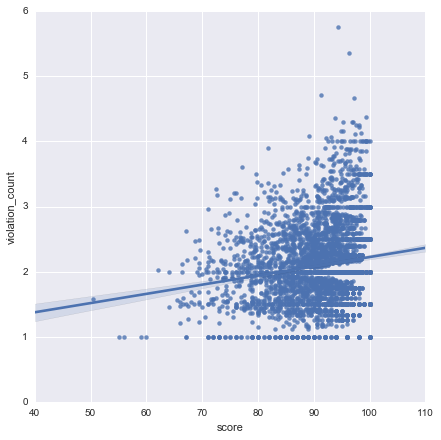

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,7))
ax = fig.gca()

ax = sns.regplot('score','violation_count',data=df_yelp_final_subset)

In [181]:
df_yelp_final_subset = df_yelp_final_subset[(df_yelp_final_subset['postal_code'] != 'CA') & (df_yelp_final_subset['postal_code'] != '00000')]

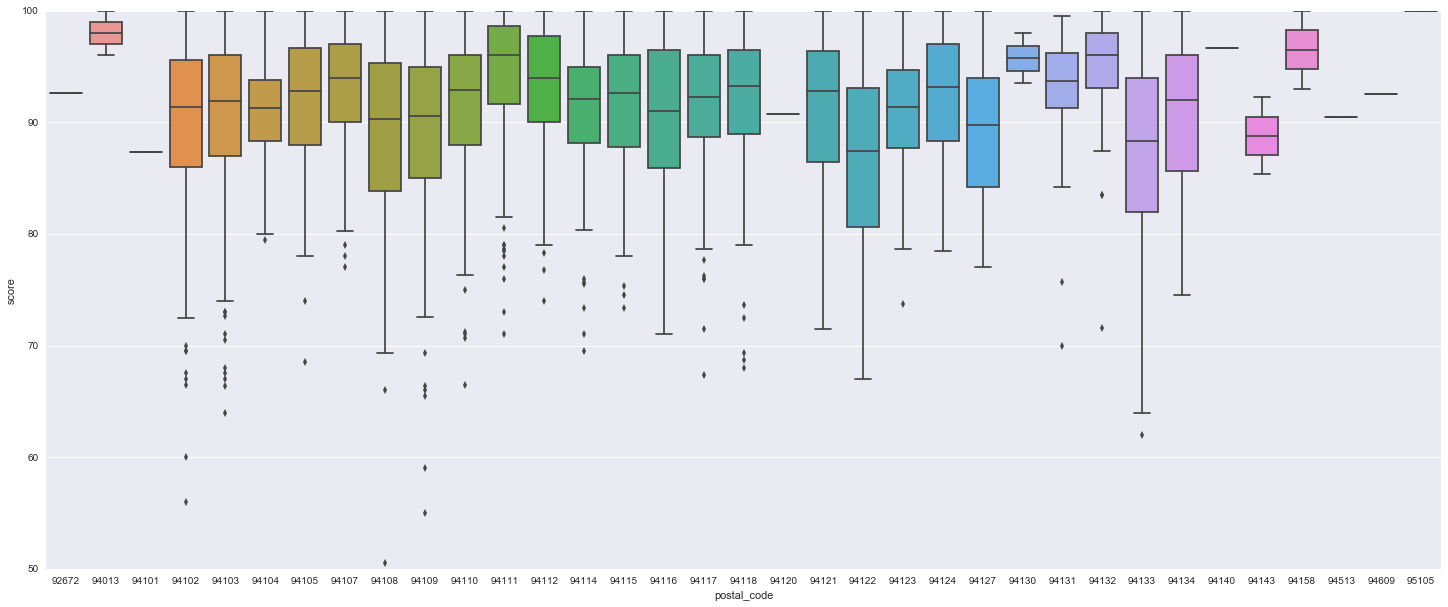

In [92]:
fig1 = plt.figure(figsize=(25,10))
ax1 = fig1.gca()

ax1 = sns.boxplot(df_yelp_final_subset['postal_code'],df_yelp_final_subset['score'])

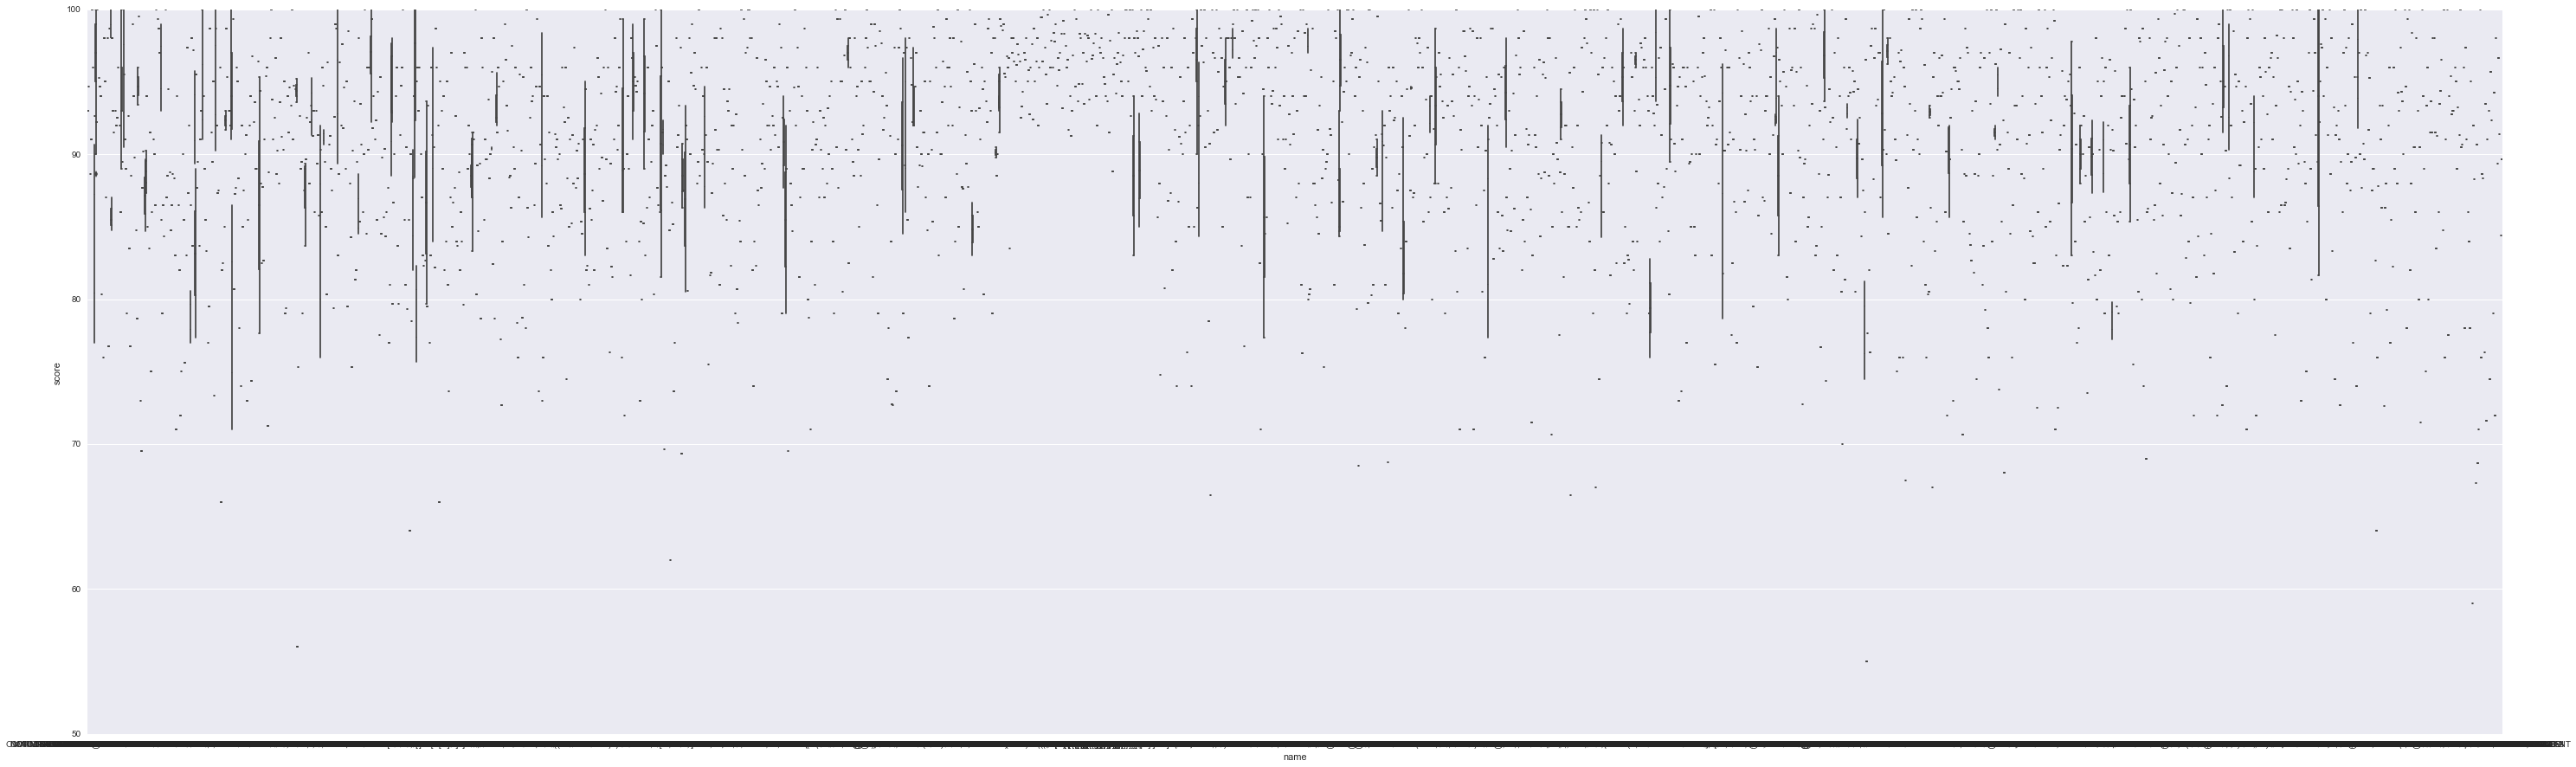

In [114]:
fig2 = plt.figure(figsize=(50,15))
ax2 = fig1.gca()

ax2 = sns.boxplot(df_yelp_final_subset['name'],df_yelp_final_subset['score'])

In [182]:
df_yelp_final_subset.corr()

,business_id,score,violation_count,days_since_first_violation,population,business_count
business_id,1.000000,-0.026630,-0.046689,-0.024465,-0.006385,0.059154
score,-0.026630,1.000000,0.155445,0.072141,-0.064819,0.028025
violation_count,-0.046689,0.155445,1.000000,0.821298,0.067811,-0.017346
days_since_first_violation,-0.024465,0.072141,0.821298,1.000000,0.039287,0.009712
population,-0.006385,-0.064819,0.067811,0.039287,1.000000,0.283243
business_count,0.059154,0.028025,-0.017346,0.009712,0.283243,1.000000


In [183]:
corr = df_yelp_final_subset[['score', 'violation_count','days_since_first_violation', 'population','business_count']]

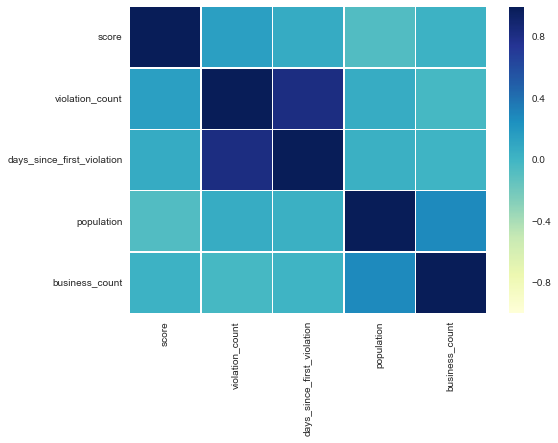

In [185]:
sns.heatmap(corr.corr(), annot=False, linewidths=.5, cmap="YlGnBu")

In [186]:
df_yelp_final_subset.columns

Index([u'business_id', u'name', u'postal_code', u'score', u'violation_count',
       u'days_since_first_violation', u'population', u'business_count'],
      dtype='object')

In [187]:
import patsy

formula = 'score ~ violation_count + days_since_first_violation + population + business_count - 1'
y, X = patsy.dmatrices(formula, df_yelp_final_subset, return_type='dataframe')
X.head()

,violation_count,days_since_first_violation,population,business_count
0,1.400000,78.400000,13000.0,112.0
1,2.200000,238.000000,25067.0,186.0
2,2.666667,411.833333,13000.0,112.0
3,1.500000,226.000000,5000.0,100.0
4,2.416667,509.500000,24178.0,98.0


In [197]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

In [198]:
from sklearn.cross_validation import train_test_split

trainX, testX, trainY, testY = train_test_split(X_norm, np.ravel(y), train_size=.75)
print trainX.shape, trainY.shape
print testX.shape, testY.shape

(2559, 4) (2559,)
(853, 4) (853,)


In [199]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.grid_search import GridSearchCV

In [200]:
search_parameters_lr = {
    'fit_intercept':[True,False],
    'normalize':[True,False]
}

lr = LinearRegression()
estimator_lr = GridSearchCV(lr, search_parameters_lr, cv=5)
results_lr = estimator_lr.fit(trainX, trainY)

In [201]:
search_parameters_lasso = {
    'alpha':np.logspace(1,100),
    'fit_intercept':[True,False]
}

lasso = Lasso()
estimator_lasso = GridSearchCV(lasso, search_parameters_lasso, cv=5)
results_lasso = estimator_lasso.fit(trainX, trainY)

In [202]:
search_parameters_ridge = {
    'alpha':np.logspace(1,100),
    'fit_intercept':[True,False]
}

ridge = Ridge()
estimator_ridge = GridSearchCV(ridge, search_parameters_ridge, cv=5)
results_ridge = estimator_ridge.fit(trainX, trainY)

In [203]:
search_parameters_en = {
    'alpha':np.logspace(1,100),
    'fit_intercept':[True,False]
}

en = ElasticNet()
estimator_en = GridSearchCV(en, search_parameters_en, cv=5)
results_en = estimator_en.fit(trainX, trainY)

In [204]:
print 'Linear Regression score:', results_lr.best_score_
print '\nLasso score:', results_lasso.best_score_
print '\nRidge score:', results_ridge.best_score_
print '\nElastic Net score:', results_en.best_score_

print '\n\nLinear Regression params:', results_lr.best_params_
print '\nLasso params:', results_lasso.best_params_
print '\nRidge params:', results_ridge.best_params_
print '\nElastic Net params:', results_en.best_params_

Linear Regression score: 0.0417089611977

Lasso score: -0.00169865275962

Ridge score: 0.0418242627651

Elastic Net score: -0.00169865275962


Linear Regression params: {'normalize': True, 'fit_intercept': True}

Lasso params: {'alpha': 10.0, 'fit_intercept': True}

Ridge params: {'alpha': 10.0, 'fit_intercept': True}

Elastic Net params: {'alpha': 10.0, 'fit_intercept': True}


In [206]:
linreg = LinearRegression(normalize=True, fit_intercept=True)
lasso1 = Lasso(alpha=10, fit_intercept=True)
ridge1 = Ridge(alpha=10, fit_intercept=True)
en1    = ElasticNet(alpha=10, fit_intercept=True)

lr_model    = linreg.fit(trainX, trainY)
lasso_model = lasso1.fit(trainX, trainY)
ridge_model = ridge1.fit(trainX, trainY)
en_model    = en1.fit(trainX, trainY)

pred_lr    = lr_model.predict(testX)
pred_lasso = lasso_model.predict(testX)
pred_ridge = ridge_model.predict(testX)
pred_en    = en_model.predict(testX)

<function matplotlib.pyplot.show>

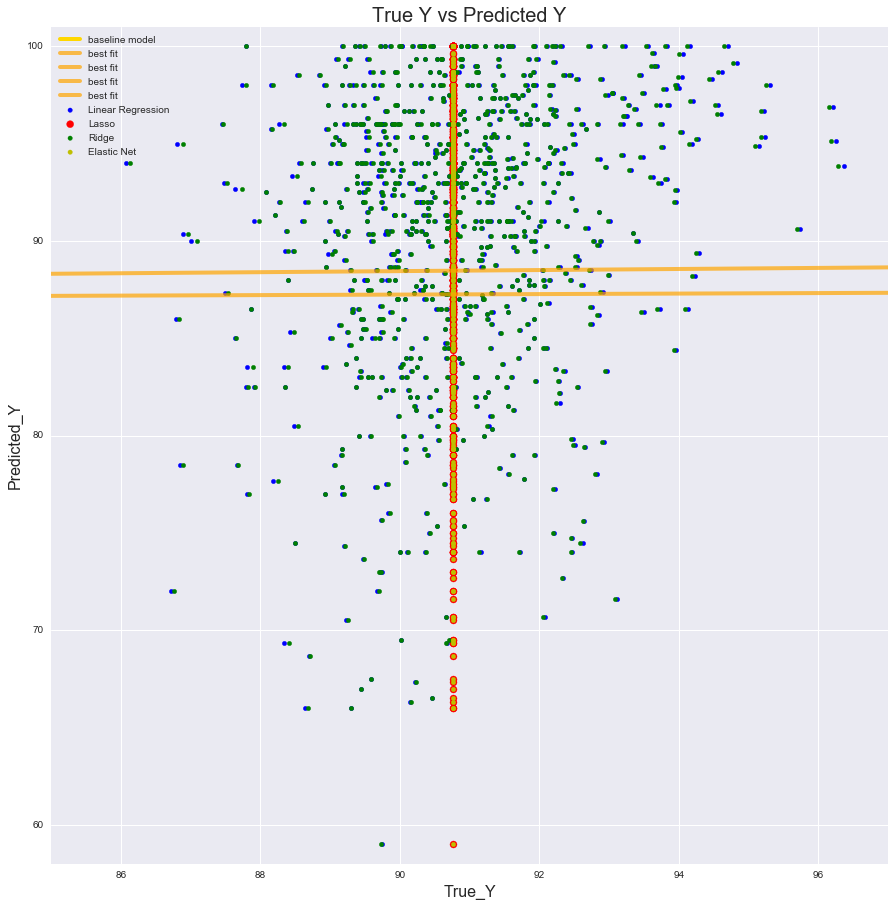

In [252]:
fig_all = plt.figure(figsize=(15,15))
ax_all  = fig_all.gca()

ax_all.scatter(pred_lr, testY, color='b', label='Linear Regression')
ax_all.scatter(pred_lasso, testY, color='red', s=50, label='Lasso')
ax_all.scatter(pred_ridge, testY, color='g', label='Ridge')
ax_all.scatter(pred_en, testY, color='y', label='Elastic Net')
ax_all.plot([np.mean(testY),np.mean(testY)], [np.min(testY), np.max(testY)], linewidth=4, color='gold', label='baseline model')
ax_all.plot([np.min(X), np.max(X)], [np.min(pred_lr), np.max(pred_lr)], color='orange', linewidth=4, alpha=0.7, label='best fit')

ax_all.set_xlabel('True_Y', size=16)
ax_all.set_ylabel('Predicted_Y', size=16)
ax_all.set_title('True Y vs Predicted Y', size=20)

ax_all.set_xlim([85,97])
ax_all.set_ylim([58,101])
plt.legend(loc='upper left')

plt.show

# Conclusion

Although through EDA there were signs that score was not affected by, or negatively correlated with my predictor variables, the results showed that violations, business count and population have little to not affect on how yelp scores were given. I can safely reject my null hypothesis.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4. Conduct another, different analysis and report on it

---

1. Combining multiple sources of data (csv files) is required.
- Perform EDA and cleaning on relevant data.
- Construct and compare different regression models with cross-validation.
- Plot descriptive visuals you think are useful for understanding the data.
- Report on your findings.

This section is just another analysis like the first sections, but is more open-ended in what models you decide to build and why. Don't feel obligated to try every out every regularized regression model (though it doesn't hurt). 


In [2]:
df_fire_incident = pd.read_csv('/Users/edwardlee/Desktop/DSI/DSI-SF-2/datasets/san_francisco/san_francisco/fire_data/fire_incidents.csv')
df_fire_inspects = pd.read_csv('/Users/edwardlee/Desktop/DSI/DSI-SF-2/datasets/san_francisco/san_francisco/fire_data/fire_inspections.csv')
df_fire_violations = pd.read_csv('/Users/edwardlee/Desktop/DSI/DSI-SF-2/datasets/san_francisco/san_francisco/fire_data/sf_firecode_violations.csv')

/Users/edwardlee/anaconda/envs/dsi/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (11,12,19,44,58) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/edwardlee/anaconda/envs/dsi/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (14,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_fire_incident.ix[:,:20].head(1)

,Incident Number,Exposure Number,Address,Incident Date,Call Number,Alarm DtTm,Arrival DtTm,Close DtTm,City,Zipcode,Battalion,Station Area,Box,Suppression Units,Suppression Personnel,EMS Units,EMS Personnel,Other Units,Other Personnel,First Unit On Scene
0,9030109,0,310 Colon Av.,04/12/2009,91020273,04/12/2009 06:09:13 PM,04/12/2009 06:13:45 PM,04/12/2009 07:23:13 PM,SF,NaN,B09,15,NaN,1,5,0,0,0,0,T15


In [4]:
df_fire_incident.ix[:,21:41].head(1)

,Estimated Contents Loss,Fire Fatalities,Fire Injuries,Civilian Fatalities,Civilian Injuries,Number of Alarms,Primary Situation,Mutual Aid,Action Taken Primary,Action Taken Secondary,Action Taken Other,Detector Alerted Occupants,Property Use,Area of Fire Origin,Ignition Cause,Ignition Factor Primary,Ignition Factor Secondary,Heat Source,Item First Ignited,Human Factors Associated with Ignition
0,NaN,0,0,0,0,NaN,551 - assist pd or other govern. agency,none,52 - forcible entry,-,-,-,"000 - property use, other",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_fire_incident.ix[:,61:].head(1)

,Neighborhood District,Location
0,NaN,NaN


In [6]:
df_fire_incident['Number of Sprinkler Heads Operating'].unique()

array([ nan,   0.,   1.,   2.,   3.,   4.,   5.,  20.,   6.])

In [7]:
df_fire_inspects.ix[:,21:].head()

,Second Notice Date,Final Notice Date,Lien Date,Sent to Bureau of Delinquent Revenue,Invoice Amount,Fee,Penalty Amount,Posting Fee,Interest Amount,Paid Amount,Paid Date,Supervisor District,Neighborhood District,Location
0,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,Nob Hill,"(37.7872968100297, -122.41808285)"
1,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Pacific Heights,"(37.7904790600297, -122.42306437)"
2,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,Financial District/South Beach,"(37.7947200000297, -122.395452)"
3,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,Chinatown,"(37.7939533600297, -122.40720213)"
4,NaN,NaN,NaN,False,157.0,157.0,NaN,NaN,NaN,157.0,01/15/2016,8.0,Mission,"(37.7654716000296, -122.42595627)"


In [8]:
df_fire_incident['Station Area'].unique()

array(['15', '39', '01', '10', '03', '16', '44', '40', '37', '35', '28',
       '33', '31', '07', '02', '38', '43', '17', '36', '06', '48', '12',
       '13', '23', '08', '20', 'A1', '41', '14', '29', '42', '21', '19',
       '11', '25', 'A3', '09', '26', '22', '34', '32', '18', '24', '05',
       'A2', '51', 'H1', nan, '53', '04', 'OT', 'A4', '99', '47', 1.0, 5.0,
       32.0, 7.0, 3.0, 13.0, 28.0, 35.0, 10.0, 11.0, 33.0, 31.0, 9.0, 34.0,
       41.0, 2.0, 29.0, 18.0, 20.0, 39.0, 21.0, 36.0, 8.0, 51.0, 14.0,
       24.0, 17.0, 26.0, 25.0, 15.0, 16.0, 37.0, 38.0, 44.0, 4.0, 42.0,
       12.0, 6.0, 43.0, 19.0, 22.0, 40.0, 48.0, 23.0, 47.0, 94.0], dtype=object)

In [9]:
df_fire_violations['Station Area'].unique()

array(['13', '07', '01', '03', '60', '16', '32', '06', '36', '33', '17',
       '10', '41', '14', '05', '08', '34', '28', '24', '35', '11', '40',
       '02', '43', '44', '25', '19', '12', '38', '42', '09', '15', 'AP',
       '00', '39', '18', nan, '37', '20', '29', '21', '26', '23', '31',
       '22', '48'], dtype=object)

In [10]:
df_fire_inspects['Station Area'].unique()

array(['03', '38', '13', '02', '06', '16', 'AP', '08', '01', '14', '29',
       '39', '05', '35', '36', '11', nan, '07', '00', '48', '28', '25',
       '22', '34', '12', '31', '41', '40', '19', '18', '17', '09', '24',
       '44', '10', '23', '42', '21', '37', '33', '15', '32', '60', '43',
       '20', '26', '51'], dtype=object)

In [11]:
print 'incident: ', df_fire_incident.shape
print 'inspect: ', df_fire_inspects.shape
print 'violation: ', df_fire_violations.shape

incident:  (406736, 63)
inspect:  (190825, 35)
violation:  (8876, 18)


In [12]:
def remove_string(x):
    try:
        return float(x)
    except:
        return np.nan

df_fire_incident['Station Area'] = df_fire_incident['Station Area'].apply(remove_string)
df_fire_inspects['Station Area'] = df_fire_inspects['Station Area'].apply(remove_string)
df_fire_violations['Station Area'] = df_fire_violations['Station Area'].apply(remove_string)

In [22]:
df_fire_1 = df_fire_incident[['Station Area', 'Suppression Units','Suppression Personnel', 'EMS Units','EMS Personnel','Fire Fatalities','Fire Injuries','Civilian Fatalities','Civilian Injuries']]
df_fire_1.dropna(inplace=True)

/Users/edwardlee/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [23]:
df_fire_2 = df_fire_inspects[['Station Area', 'Inspection Status']]
df_fire_2.dropna(inplace=True)

/Users/edwardlee/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [24]:
df_fire_3 = df_fire_violations[['Station Area','Status']]
df_fire_3.dropna(inplace=True)

/Users/edwardlee/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [16]:
df_fire_violations.isnull().sum()

Violation Id                     0
Violation Number                 0
Violation Date                   0
Violation Item                  13
Violation Item Description      83
Citation Number               8853
Corrective Action             4851
Inspection Number               89
Address                          0
Zipcode                         34
Battalion                        7
Station Area                    90
Fire Prevention District         4
Status                           0
Close Date                       0
Supervisor District             34
Neighborhood  District          34
Location                        15
dtype: int64

In [17]:
df_fire_violations['Supervisor District'].value_counts()

3.0     2561
6.0     2111
9.0      945
2.0      766
5.0      708
8.0      602
10.0     585
7.0      169
1.0      160
11.0     153
4.0       82
Name: Supervisor District, dtype: int64

In [34]:
df_fire_4 = df_fire_1.groupby('Station Area').mean().reset_index()
df_fire_4.head()

,Station Area,Suppression Units,Suppression Personnel,EMS Units,EMS Personnel,Fire Fatalities,Fire Injuries,Civilian Fatalities,Civilian Injuries
0,1.0,2.562328,9.439787,0.104864,0.194518,0.0,0.000376,0.000024,0.001457
1,2.0,2.640033,9.895010,0.094491,0.177393,0.0,0.000273,0.000000,0.000545
2,3.0,2.623982,9.779239,0.134719,0.244902,0.0,0.000324,0.000072,0.001585
3,4.0,2.648148,9.509259,0.185185,0.337963,0.0,0.000000,0.000000,0.000000
4,5.0,2.492550,9.248544,0.129037,0.257091,0.0,0.000227,0.000000,0.000605


In [41]:
def binary(x):
    if 'completed' in x:
        return 1
    elif 'pending' in x:
        return 2
    elif 'open/follow-up needed' in x:
        return 2
    else:
        return 3
df_fire_2['Inspection Status'] = df_fire_2['Inspection Status'].apply(binary)

/Users/edwardlee/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [56]:
df_fire_5 = df_fire_2.groupby('Station Area').mean().reset_index()

In [45]:
def change_binary(x):
    if 'open' in x:
        return 1
    else:
        return 0
df_fire_3['Status'] = df_fire_3['Status'].apply(change_binary)

/Users/edwardlee/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [55]:
df_fire_6 = df_fire_3.groupby('Station Area').mean().reset_index()

In [90]:
df_fire_final = pd.merge(df_fire_4, df_fire_5, on='Station Area', how='left').merge(df_fire_6, on='Station Area', how='left')
df_fire_final.head()

,Station Area,Suppression Units,Suppression Personnel,EMS Units,EMS Personnel,Fire Fatalities,Fire Injuries,Civilian Fatalities,Civilian Injuries,Inspection Status,Status
0,1.0,2.562328,9.439787,0.104864,0.194518,0.0,0.000376,0.000024,0.001457,1.056416,0.155440
1,2.0,2.640033,9.895010,0.094491,0.177393,0.0,0.000273,0.000000,0.000545,1.059762,0.107744
2,3.0,2.623982,9.779239,0.134719,0.244902,0.0,0.000324,0.000072,0.001585,1.038520,0.068525
3,4.0,2.648148,9.509259,0.185185,0.337963,0.0,0.000000,0.000000,0.000000,NaN,NaN
4,5.0,2.492550,9.248544,0.129037,0.257091,0.0,0.000227,0.000000,0.000605,1.045311,0.028777


In [91]:
df_fire_final.dropna(inplace=True)

# Hypothesis

As Suppression and EMS units/personnel increase, the lower the civilian injuries and fatalities.

In [94]:
df_fire_final_plot = df_fire_final.ix[:,1:9]

In [95]:
df_fire_final_plot.corr()

,Suppression Units,Suppression Personnel,EMS Units,EMS Personnel,Fire Fatalities,Fire Injuries,Civilian Fatalities,Civilian Injuries
Suppression Units,1.000000,0.664676,-0.064262,-0.151548,-0.098748,0.059096,-0.128379,-0.045360
Suppression Personnel,0.664676,1.000000,-0.336602,-0.355983,-0.129658,-0.154944,-0.146015,-0.179796
EMS Units,-0.064262,-0.336602,1.000000,0.969267,-0.052680,0.370029,0.059544,0.433772
EMS Personnel,-0.151548,-0.355983,0.969267,1.000000,-0.047121,0.313660,0.042202,0.360616
Fire Fatalities,-0.098748,-0.129658,-0.052680,-0.047121,1.000000,0.601756,0.634928,0.264048
Fire Injuries,0.059096,-0.154944,0.370029,0.313660,0.601756,1.000000,0.409078,0.796126
Civilian Fatalities,-0.128379,-0.146015,0.059544,0.042202,0.634928,0.409078,1.000000,0.387648
Civilian Injuries,-0.045360,-0.179796,0.433772,0.360616,0.264048,0.796126,0.387648,1.000000


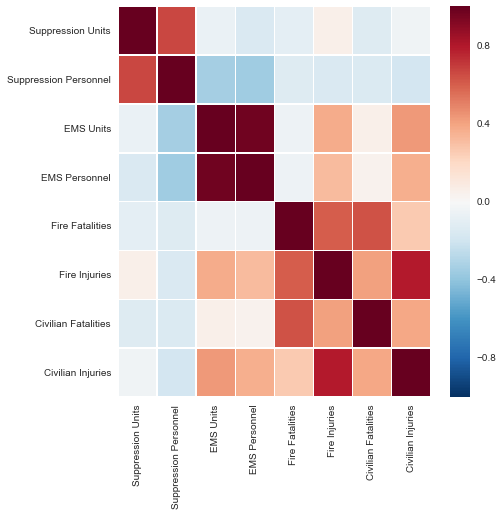

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,7))
ax = fig.gca()

ax = sns.heatmap(df_fire_final_plot.corr(), linewidths=.5)

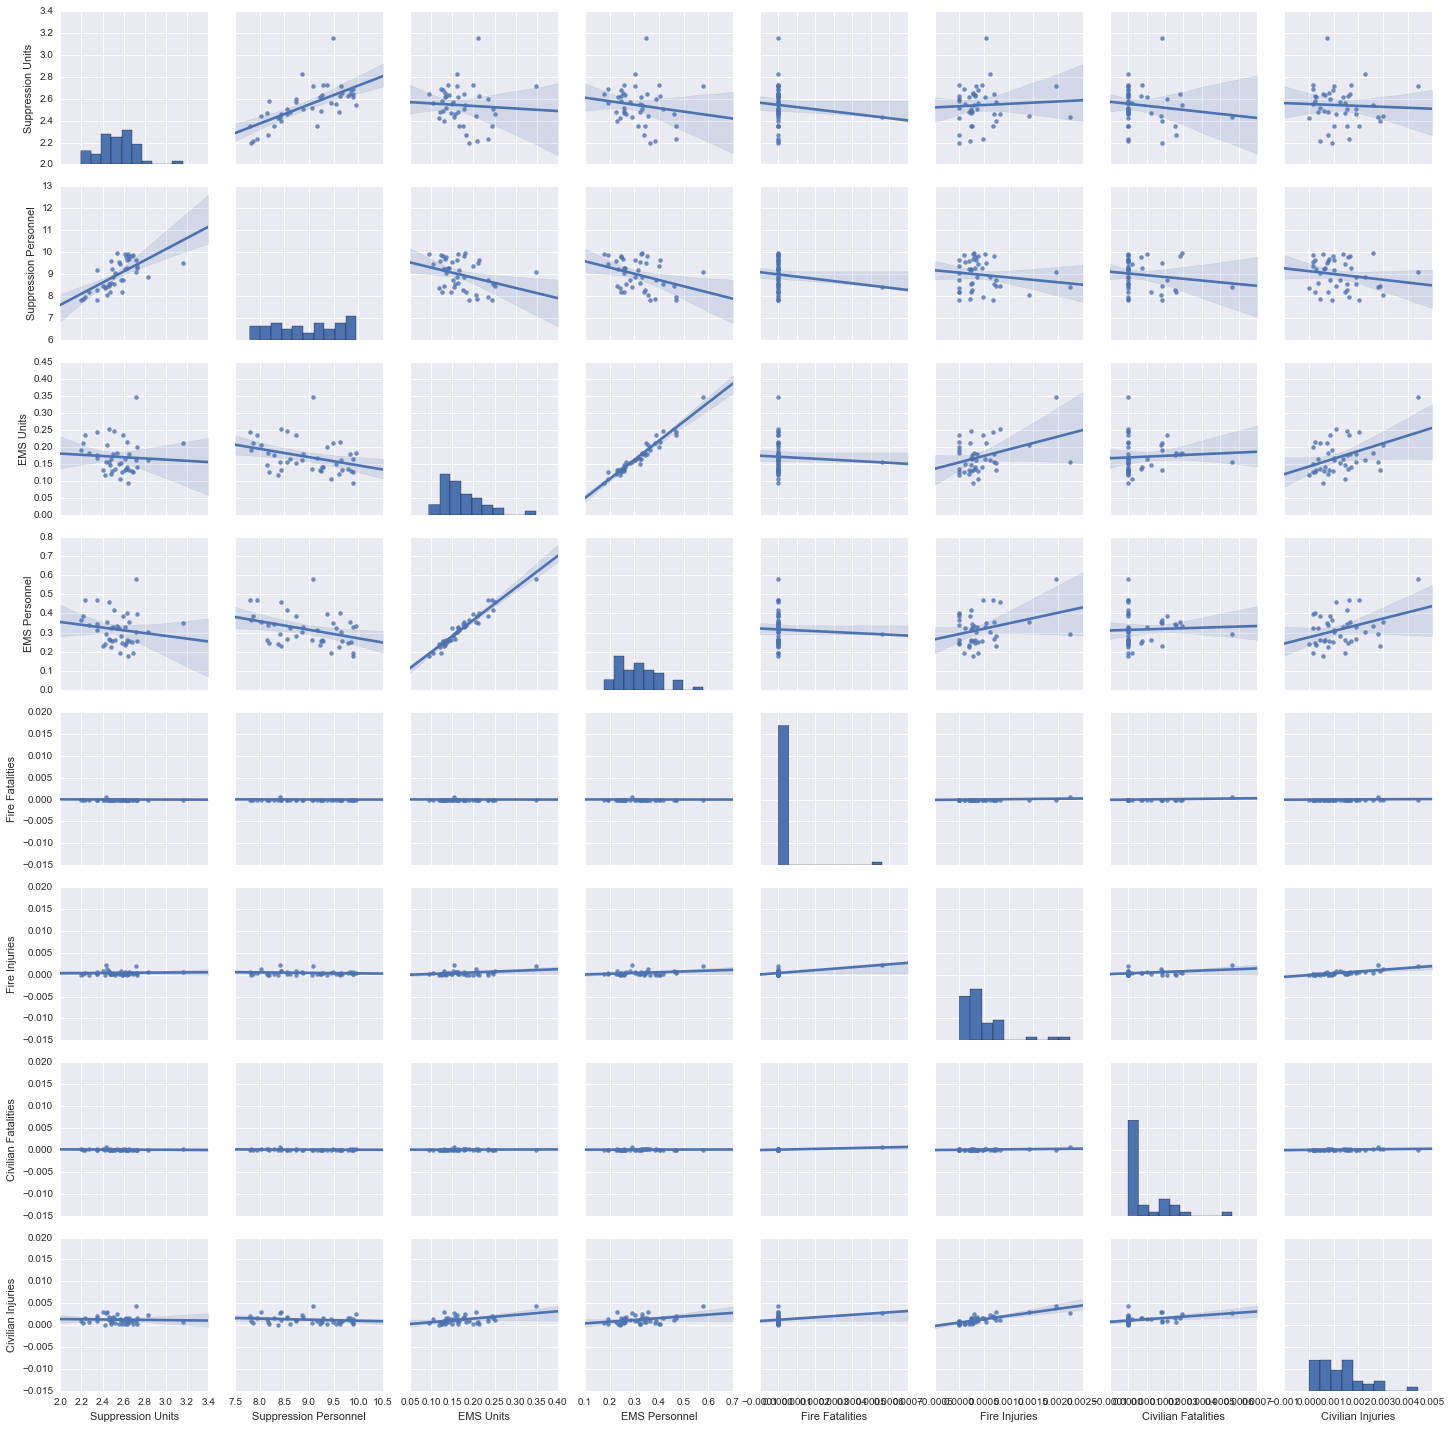

In [97]:
ax = sns.pairplot(df_fire_final_plot, kind='reg')

In [100]:
df_fire_final_plot.rename(columns={'Suppression Units':'sup_units','Suppression Personnel':'sup_personnel','EMS Units':'ems_units','EMS Personnel':'ems_personnel','Fire Fatalities':'fire_fat', 'Fire Injuries':'fire_inj','Civilian Fatalities':'civ_fat','Civilian Injuries':'civ_inj'},inplace=True)

/Users/edwardlee/anaconda/envs/dsi/lib/python2.7/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [101]:
df_fire_final_plot.columns

Index([u'sup_units', u'sup_personnel', u'ems_units', u'ems_personnel',
       u'fire_fat', u'fire_inj', u'civ_fat', u'civ_inj'],
      dtype='object')

In [104]:
import patsy

formula = 'civ_inj ~ sup_units + sup_personnel + ems_units + ems_personnel + fire_fat + fire_inj - 1'
formula1 = 'civ_fat ~ sup_units + sup_personnel + ems_units + ems_personnel + fire_fat + fire_inj - 1'
y, X = patsy.dmatrices(formula, df_fire_final_plot, return_type='dataframe')
y1, X1 = patsy.dmatrices(formula1, df_fire_final_plot, return_type='dataframe')

In [105]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split

In [106]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
X1_norm = scaler.fit_transform(X1)

In [107]:
# civ inj train-test split
trainX, testX, trainY, testY = train_test_split(X, np.ravel(y), train_size=.75)
print trainX.shape, testX.shape
print trainY.shape, testY.shape
# civ fat train-test split
trainX1, testX1, trainY1, testY1 = train_test_split(X1, np.ravel(y1), train_size=.75)
print trainX1.shape, testX1.shape
print trainY1.shape, testY1.shape

(31, 6) (11, 6)
(31,) (11,)
(31, 6) (11, 6)
(31,) (11,)


In [111]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.grid_search import GridSearchCV

In [112]:
# civ inj
search_parameters_lr = {
    'fit_intercept':[True,False],
    'normalize':[True,False]
}

lr = LinearRegression()
estimator_lr = GridSearchCV(lr, search_parameters_lr, cv=5)
results_lr = estimator_lr.fit(trainX, trainY)

search_parameters_lasso = {
    'alpha':np.logspace(1,100),
    'fit_intercept':[True,False]
}

lasso = Lasso()
estimator_lasso = GridSearchCV(lasso, search_parameters_lasso, cv=5)
results_lasso = estimator_lasso.fit(trainX, trainY)

search_parameters_ridge = {
    'alpha':np.logspace(1,100),
    'fit_intercept':[True,False]
}

ridge = Ridge()
estimator_ridge = GridSearchCV(ridge, search_parameters_ridge, cv=5)
results_ridge = estimator_ridge.fit(trainX, trainY)

search_parameters_en = {
    'alpha':np.logspace(1,100),
    'fit_intercept':[True,False]
}

en = ElasticNet()
estimator_en = GridSearchCV(en, search_parameters_en, cv=5)
results_en = estimator_en.fit(trainX, trainY)

print 'Linear Regression score:', results_lr.best_score_
print '\nLasso score:', results_lasso.best_score_
print '\nRidge score:', results_ridge.best_score_
print '\nElastic Net score:', results_en.best_score_

print '\n\nLinear Regression params:', results_lr.best_params_
print '\nLasso params:', results_lasso.best_params_
print '\nRidge params:', results_ridge.best_params_
print '\nElastic Net params:', results_en.best_params_

Linear Regression score: 0.384552974292

Lasso score: -0.251084547251

Ridge score: -0.207113722506

Elastic Net score: -0.251084547251


Linear Regression params: {'normalize': True, 'fit_intercept': False}

Lasso params: {'alpha': 10.0, 'fit_intercept': True}

Ridge params: {'alpha': 10.0, 'fit_intercept': True}

Elastic Net params: {'alpha': 10.0, 'fit_intercept': True}


In [113]:
linreg = LinearRegression(normalize=True, fit_intercept=True)
lasso1 = Lasso(alpha=10, fit_intercept=True)
ridge1 = Ridge(alpha=10, fit_intercept=True)
en1    = ElasticNet(alpha=10, fit_intercept=True)

lr_model    = linreg.fit(trainX, trainY)
lasso_model = lasso1.fit(trainX, trainY)
ridge_model = ridge1.fit(trainX, trainY)
en_model    = en1.fit(trainX, trainY)

pred_lr    = lr_model.predict(testX)
pred_lasso = lasso_model.predict(testX)
pred_ridge = ridge_model.predict(testX)
pred_en    = en_model.predict(testX)

<function matplotlib.pyplot.show>

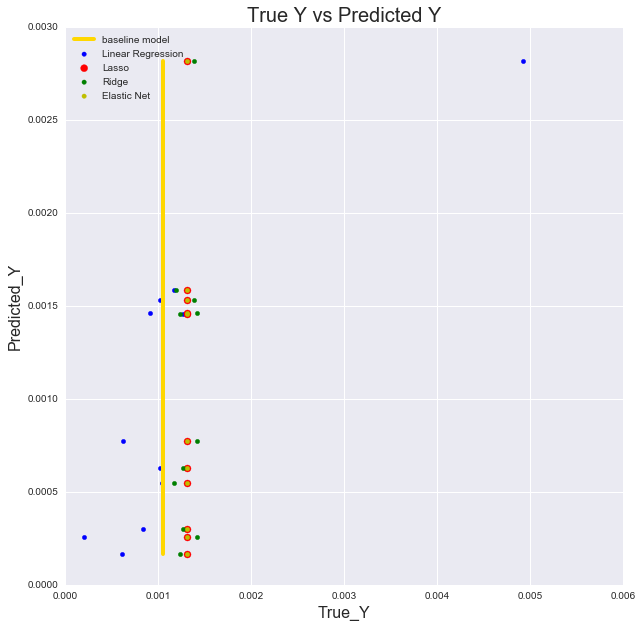

In [120]:
fig_all = plt.figure(figsize=(10,10))
ax_all  = fig_all.gca()

ax_all.scatter(pred_lr, testY, color='b', label='Linear Regression')
ax_all.scatter(pred_lasso, testY, color='red', s=50, label='Lasso')
ax_all.scatter(pred_ridge, testY, color='g', label='Ridge')
ax_all.scatter(pred_en, testY, color='y', label='Elastic Net')
ax_all.plot([np.mean(testY),np.mean(testY)], [np.min(testY), np.max(testY)], linewidth=4, color='gold', label='baseline model')
# ax_all.plot([np.min(X), np.max(X)], [np.min(pred_lr), np.max(pred_lr)], color='orange', linewidth=4, alpha=0.7, label='best fit')

ax_all.set_xlabel('True_Y', size=16)
ax_all.set_ylabel('Predicted_Y', size=16)
ax_all.set_title('True Y vs Predicted Y', size=20)

ax_all.set_xlim([0,0.006])
ax_all.set_ylim([0,0.003])
plt.legend(loc='upper left')

plt.show

In [121]:
# civ fatality
search_parameters_lr = {
    'fit_intercept':[True,False],
    'normalize':[True,False]
}

lr = LinearRegression()
estimator_lr = GridSearchCV(lr, search_parameters_lr, cv=5)
results_lr = estimator_lr.fit(trainX1, trainY1)

search_parameters_lasso = {
    'alpha':np.logspace(1,100),
    'fit_intercept':[True,False]
}

lasso = Lasso()
estimator_lasso = GridSearchCV(lasso, search_parameters_lasso, cv=5)
results_lasso = estimator_lasso.fit(trainX1, trainY1)

search_parameters_ridge = {
    'alpha':np.logspace(1,100),
    'fit_intercept':[True,False]
}

ridge = Ridge()
estimator_ridge = GridSearchCV(ridge, search_parameters_ridge, cv=5)
results_ridge = estimator_ridge.fit(trainX1, trainY1)

search_parameters_en = {
    'alpha':np.logspace(1,100),
    'fit_intercept':[True,False]
}

en = ElasticNet()
estimator_en = GridSearchCV(en, search_parameters_en, cv=5)
results_en = estimator_en.fit(trainX1, trainY1)

print 'Linear Regression score:', results_lr.best_score_
print '\nLasso score:', results_lasso.best_score_
print '\nRidge score:', results_ridge.best_score_
print '\nElastic Net score:', results_en.best_score_

print '\n\nLinear Regression params:', results_lr.best_params_
print '\nLasso params:', results_lasso.best_params_
print '\nRidge params:', results_ridge.best_params_
print '\nElastic Net params:', results_en.best_params_

Linear Regression score: -0.393134279343

Lasso score: -0.0388188854256

Ridge score: -0.0388188854256

Elastic Net score: -0.0388188854256


Linear Regression params: {'normalize': True, 'fit_intercept': False}

Lasso params: {'alpha': 10.0, 'fit_intercept': True}

Ridge params: {'alpha': 1.4563484775012384e+17, 'fit_intercept': True}

Elastic Net params: {'alpha': 10.0, 'fit_intercept': True}


In [122]:
linreg = LinearRegression(normalize=True, fit_intercept=True)
lasso1 = Lasso(alpha=10, fit_intercept=True)
ridge1 = Ridge(alpha=10, fit_intercept=True)
en1    = ElasticNet(alpha=10, fit_intercept=True)

lr_model    = linreg.fit(trainX1, trainY1)
lasso_model = lasso1.fit(trainX1, trainY1)
ridge_model = ridge1.fit(trainX1, trainY1)
en_model    = en1.fit(trainX1, trainY1)

pred_lr    = lr_model.predict(testX1)
pred_lasso = lasso_model.predict(testX1)
pred_ridge = ridge_model.predict(testX1)
pred_en    = en_model.predict(testX1)

<function matplotlib.pyplot.show>

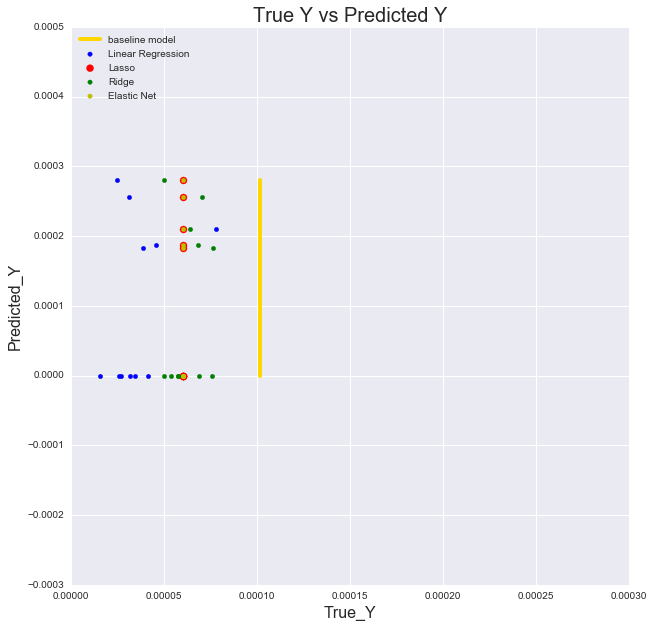

In [125]:
fig_all = plt.figure(figsize=(10,10))
ax_all  = fig_all.gca()

ax_all.scatter(pred_lr, testY1, color='b', label='Linear Regression')
ax_all.scatter(pred_lasso, testY1, color='red', s=50, label='Lasso')
ax_all.scatter(pred_ridge, testY1, color='g', label='Ridge')
ax_all.scatter(pred_en, testY1, color='y', label='Elastic Net')
ax_all.plot([np.mean(testY1),np.mean(testY1)], [np.min(testY1), np.max(testY1)], linewidth=4, color='gold', label='baseline model')
# ax_all.plot([np.min(X), np.max(X)], [np.min(pred_lr), np.max(pred_lr)], color='orange', linewidth=4, alpha=0.7, label='best fit')

ax_all.set_xlabel('True_Y', size=16)
ax_all.set_ylabel('Predicted_Y', size=16)
ax_all.set_title('True Y vs Predicted Y', size=20)

ax_all.set_xlim([0,0.0003])
ax_all.set_ylim([-0.0003,0.0005])
plt.legend(loc='upper left')

plt.show

# Conclusion

After modeling civilian fatality and civilian injuries, the number of firefighters and EMS personnel arriving to the scene did not cause more or less deaths. The deaths were directly caused when the fire started and happened before the rescue help could get there. However, there was a slight correlation between firefights and EMS personnel with civilian injuries, meaning that the difference between an injured civilian from an unharmed civilian depends on how many rescue personnel show up. It was quite interesting that Lasso, Ridge and Elastic Net did not help improve the model, rather, made it worse. I would definitely dig deeper into rescue personnel and units to see the time differences on arrival, how strong the fire was, building vs forest fire, etc... to see if there would be any difference in that aspect.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.2 Ploting GridSearch with Lasso, Ridge, or Elasticnet
---
1. Using the gridsearch results, plot your score in relation to your parameters.
1. Plot the effect on your coefficients given alpha.
1. Plot any other parameter change to visualize the impact of any other hyperparameter.

It's helpful to understand the impact of parameters used in Gridsearch, and that you are comfortable working with the data that is generated for reporting to explore the results visually.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Bias-variance tradeoff

---

1. Select San Francisco data of your choice and construct a regularized regression model (this can be data from an earlier analysis if you like). Ideally the model should actually improve across regularization strengths...
- Gridsearch the regularization parameters to find the optimal.
- Plot the regularization parameter against the cross-validated $R^2$.
- Explain how regularization and regularization strength is related to the bias-variance tradeoff.


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.1 Calculate the approximated $\text{bias}^2$ and variance across regularization strengths.

---

You can obviously use my code from the bias-variance lab to do this. 

Plot the bias and variance change _with_ the cross-validated $R^2$. 

You'll need to scale these values somehow to put them on the same chart (I recommend (MinMaxScaler)[http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html] to put $\text{bias}^2$ and variance on the same scale as cross-validated $R^2$.

<img src="http://imgur.com/HNPKfE8.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Custom regularized regression penalties

---

The $\lambda1$ and $\lambda2$ norm regularization penalties (Lasso and Ridge) are the most commonly used regularization penalties. They have a solid foundation in statistics and evidence of effectiveness. However, these are not the only possible penalties for regression – sometimes new, customized penalties give additional performance and predictive power to models depending on the context.

For example, when I worked in neuroscience [we created an effective penalized regression dubbed "GraphNet"](http://arxiv.org/abs/1110.4139) that combined the Lasso and Ridge penalties like in Elastic net with a third penalty that rewarded clustering of coefficients according to physical distance in FMRI brain activation data.

**Devise of and implement a penalized regression for San Francisco data.** What is your rationale – why would this be useful? How does it perform compared to the standard Ridge, Lasso, and Elastic Net penalties?